In [10]:
import pandas as pd
import warnings as w
w.filterwarnings("ignore")

In [71]:
df1=pd.read_csv("mcdonalds.csv")
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [43]:
df1.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [44]:
df1.isna()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df=df1.drop(columns=["VisitFrequency","Gender"])

In [15]:
df.replace({'Yes':1,'No':0}, inplace=True)

In [16]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
0,0,1,0,1,0,1,1,0,1,0,0,-3,61
1,1,1,0,1,1,1,1,1,1,0,0,+2,51
2,0,1,1,1,1,1,0,1,1,1,0,+1,62
3,1,1,0,1,1,1,1,1,0,0,1,+4,69
4,0,1,0,1,1,1,1,0,0,1,0,+2,49


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA()
x=df.iloc[:,:11]
p=pca.fit(x)

In [18]:
p

PCA()

In [19]:
print("PCA Summary")
summary= pd.DataFrame({"Standard Deviation": np.round(np.sqrt(p.explained_variance_), 2),
    "Proportion of Variance": np.round(p.explained_variance_ratio_, 4),
    "Cumulative Proportion": np.round(p.explained_variance_ratio_.cumsum(), 4)
}, index=[f"PC{i+1}" for i in range(x.shape[1])])
print(summary)
print("\n PCA Loadings:")
print(pd.DataFrame(p.components_, columns=x.columns))

PCA Summary
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1                 0.76                  0.2994                 0.2994
PC2                 0.61                  0.1928                 0.4922
PC3                 0.50                  0.1330                 0.6253
PC4                 0.40                  0.0831                 0.7084
PC5                 0.34                  0.0595                 0.7679
PC6                 0.31                  0.0503                 0.8182
PC7                 0.29                  0.0438                 0.8620
PC8                 0.28                  0.0395                 0.9016
PC9                 0.27                  0.0368                 0.9383
PC10                0.25                  0.0324                 0.9707
PC11                0.24                  0.0293                 1.0000

 PCA Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0   0.476933    0.155332  0.0

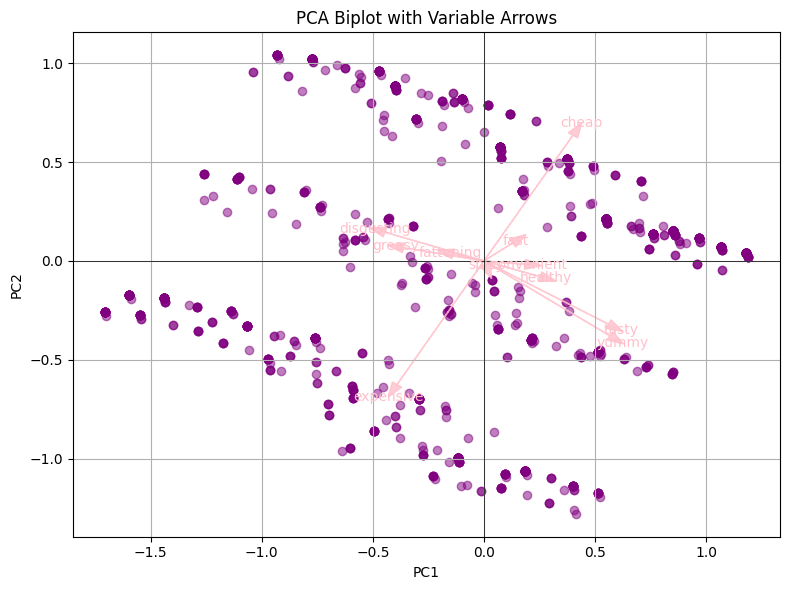

In [20]:
sc=pca.transform(x)
plt.figure(figsize=(8,6))
plt.scatter(sc[:,0],sc[:,1],color='purple', alpha=0.5)
for i,(z,y) in enumerate(zip(pca.components_[0],pca.components_[1])):
  plt.arrow(0,0,z*max(sc[:,0]),y*max(sc[:,1]),
            color='pink', alpha=0.8, head_width=0.05)
  plt.text(z * max(sc[:, 0]) * 1.1, y * max(sc[:, 1]) * 1.1,
             x.columns[i], color='pink', ha='center', va='center')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot with Variable Arrows")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

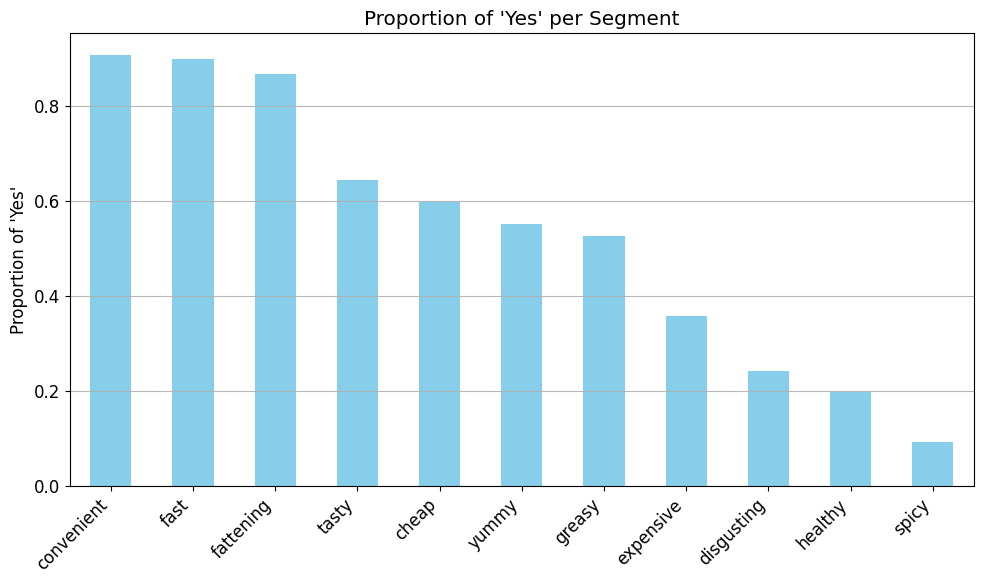

In [101]:
col_means = x.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
col_means.plot(kind='bar', color='skyblue')
plt.ylabel("Proportion of 'Yes'")
plt.title("Proportion of 'Yes' per Segment")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.9)
plt.tight_layout()
plt.show()

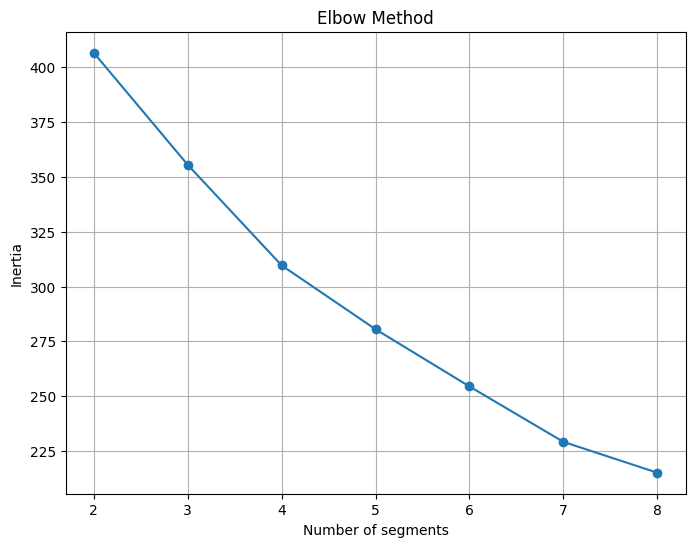

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
np.random.seed(1234)
X=np.random.rand(100,5)
cc=StandardScaler()
X=cc.fit_transform(X)
inertias=[]
models=[]
for k in range(2,9):
  model=KMeans(n_clusters=k, n_init=10, random_state=1234)
  model.fit(X)
  inertias.append(model.inertia_)
  models.append(model)
plt.figure(figsize=(8,6))
plt.plot(range(2,9),inertias, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

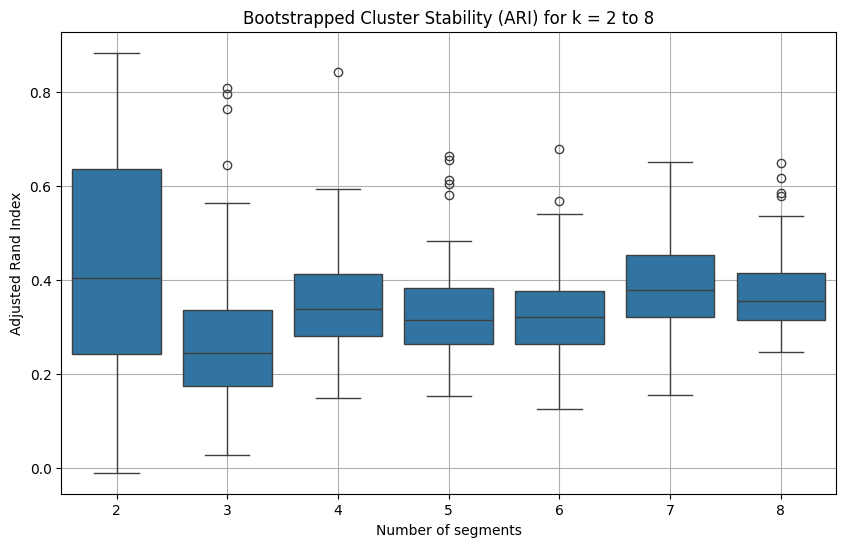

In [22]:
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)


MD_x = pd.DataFrame(np.random.rand(100, 5), columns=[f"Feature_{i}" for i in range(1, 6)])


scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


cluster_range = range(2, 9)
n_boot = 100
n_init = 10


results = []

for k in cluster_range:
    kmeans_full = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
    kmeans_full.fit(MD_x_scaled)
    full_labels = kmeans_full.labels_

    for _ in range(n_boot):
        X_boot= resample(MD_x_scaled)
        kmeans_boot = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        kmeans_boot.fit(X_boot)
        boot_labels = kmeans_boot.predict(MD_x_scaled)  # Predict on original

        ari = adjusted_rand_score(full_labels, boot_labels)
        results.append({'k': k, 'ARI': ari})


results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.boxplot(x='k', y='ARI', data=results_df)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrapped Cluster Stability (ARI) for k = 2 to 8")
plt.grid(True)
plt.show()

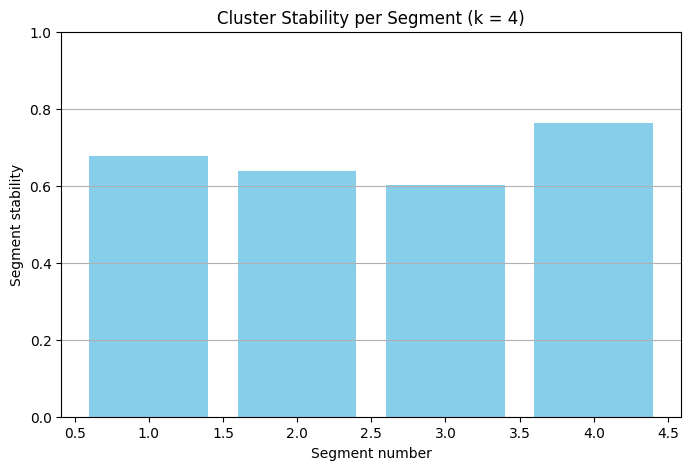

In [23]:
from scipy.stats import mode
k = 4
kmeans_ref = KMeans(n_clusters=k, n_init=10, random_state=1234)
ref_labels = kmeans_ref.fit_predict(MD_x_scaled)
n_boot = 100
cluster_match_counts = np.zeros((k, n_boot))
for i in range(n_boot):
    X_boot = resample(MD_x_scaled)
    kmeans_boot = KMeans(n_clusters=k, n_init=10, random_state=1234)
    boot_labels = kmeans_boot.fit_predict(X_boot)
    predicted_labels = kmeans_boot.predict(MD_x_scaled)
    for cluster_id in range(k):
        idx = np.where(ref_labels == cluster_id)[0]
        if len(idx) == 0:
            continue
        boot_majority = mode(predicted_labels[idx], keepdims=False).mode
        stability = np.sum(predicted_labels[idx] == boot_majority) / len(idx)
        cluster_match_counts[cluster_id, i] = stability

mean_stability = cluster_match_counts.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.bar(range(1, k + 1), mean_stability, color="skyblue")
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Cluster Stability per Segment (k = 4)")
plt.grid(True, axis='y')
plt.show()

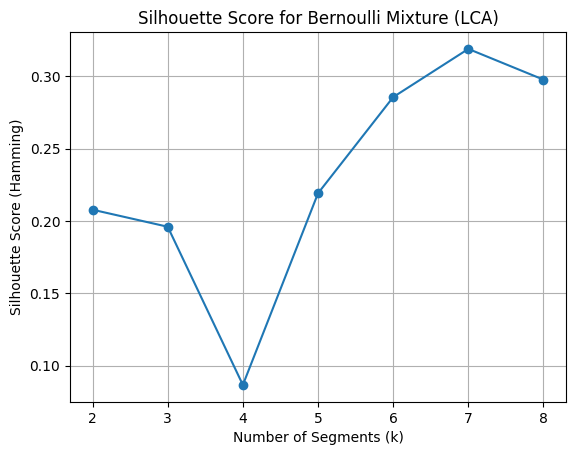

Best number of segments (k): 7


In [24]:
from sklearn.metrics import silhouette_score

np.random.seed(1234)
X = np.random.randint(0, 2, size=(100, 6))

def e_step(X, pi, theta):
    N, D = X.shape
    K = len(pi)
    gamma = np.zeros((N, K))

    for k in range(K):
        log_prob = X * np.log(theta[k] + 1e-10) + (1 - X) * np.log(1 - theta[k] + 1e-10)
        log_prob = np.sum(log_prob, axis=1)
        gamma[:, k] = np.log(pi[k] + 1e-10) + log_prob

    gamma = np.exp(gamma)
    gamma /= np.sum(gamma, axis=1, keepdims=True)
    return gamma

def m_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    Nk = np.sum(gamma, axis=0)
    pi = Nk / N
    theta = np.dot(gamma.T, X) / Nk[:, None]
    return pi, theta

def run_em(X, K, n_iter=50):
    N, D = X.shape
    pi = np.ones(K) / K
    theta = np.random.rand(K, D)

    for i in range(n_iter):
        gamma = e_step(X, pi, theta)
        pi, theta = m_step(X, gamma)

    labels = np.argmax(gamma, axis=1)
    return labels, pi, theta

scores = []
results = {}

for k in range(2, 9):
    labels, pi, theta = run_em(X, k)
    try:
        score = silhouette_score(X, labels, metric='hamming')
    except:
        score = np.nan
    scores.append(score)
    results[k] = (labels, pi, theta)

plt.plot(range(2, 9), scores, marker='o')
plt.title("Silhouette Score for Bernoulli Mixture (LCA)")
plt.xlabel("Number of Segments (k)")
plt.ylabel("Silhouette Score (Hamming)")
plt.grid(True)
plt.show()

best_k = range(2, 9)[np.nanargmax(scores)]
print(f"Best number of segments (k): {best_k}")

In [25]:
!pip install kmodes

Gaussian Mixture Model Results:

Components: 2
  Converged: True
  Log Likelihood: 11147.82
  AIC: -21985.64
  BIC: -21167.03
  ICL (approx): -21167.03

Components: 3
  Converged: True
  Log Likelihood: 14126.45
  AIC: -27786.90
  BIC: -26556.34
  ICL (approx): -26556.34

Components: 4
  Converged: True
  Log Likelihood: 17513.54
  AIC: -34405.08
  BIC: -32762.57
  ICL (approx): -32761.87

Components: 5
  Converged: True
  Log Likelihood: 22500.93
  AIC: -44223.86
  BIC: -42169.40
  ICL (approx): -42169.29

Components: 6
  Converged: True
  Log Likelihood: 28522.04
  AIC: -56110.08
  BIC: -53643.68
  ICL (approx): -53643.67

Components: 7
  Converged: True
  Log Likelihood: 29652.48
  AIC: -58214.95
  BIC: -55336.60
  ICL (approx): -55336.37

Components: 8
  Converged: True
  Log Likelihood: 26714.81
  AIC: -52183.62
  BIC: -48893.32
  ICL (approx): -48892.53



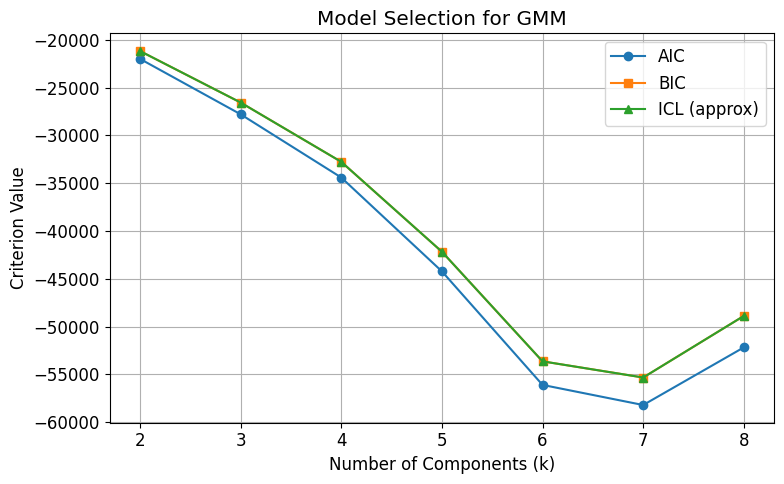

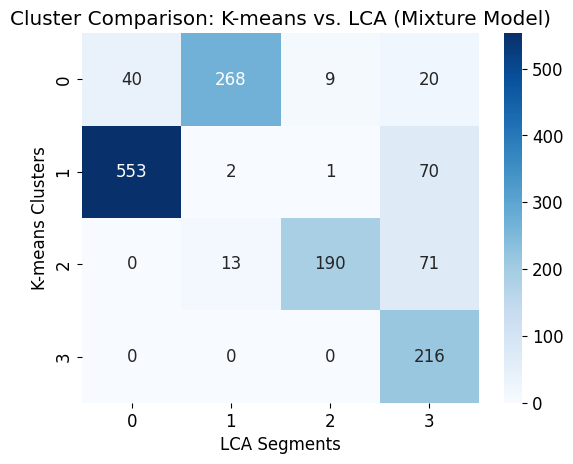

In [103]:
from kmodes.kmodes import KModes
from sklearn.metrics import confusion_matrix
if 'x' not in locals():
    x = pd.DataFrame(np.random.randint(0, 2, size=(200, 11)), columns=[f"Var{i+1}" for i in range(11)])

aic_values = []
bic_values = []
icl_values = []

print("Gaussian Mixture Model Results:\n")

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(x)

    log_likelihood = model.lower_bound_ * len(x)
    log_prob_norm = model.score_samples(x)
    predicted_labels = model.predict(x)

    responsibilities = model.predict_proba(x)
    entropy = -np.sum(responsibilities * np.log(responsibilities + 1e-10), axis=1).sum()
    icl = model.bic(x) + entropy

    aic_values.append(model.aic(x))
    bic_values.append(model.bic(x))
    icl_values.append(icl)

    print(f"Components: {k}")
    print(f"  Converged: {model.converged_}")
    print(f"  Log Likelihood: {log_likelihood:.2f}")
    print(f"  AIC: {aic_values[-1]:.2f}")
    print(f"  BIC: {bic_values[-1]:.2f}")
    print(f"  ICL (approx): {icl_values[-1]:.2f}")
    print()

plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='s', label='BIC')
plt.plot(range(2, 9), icl_values, marker='^', label='ICL (approx)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Criterion Value')
plt.title('Model Selection for GMM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
kmeans_model = KModes(n_clusters=4, init='Huang', n_init=10, random_state=1234)
X_lca = x.values
kmeans_labels = kmeans_model.fit_predict(X_lca)
lca_labels, pi4, theta4 = run_em(X_lca, 4)
conf_matrix = confusion_matrix(kmeans_labels, lca_labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster Comparison: K-means vs. LCA (Mixture Model)")
plt.xlabel("LCA Segments")
plt.ylabel("K-means Clusters")
plt.show()

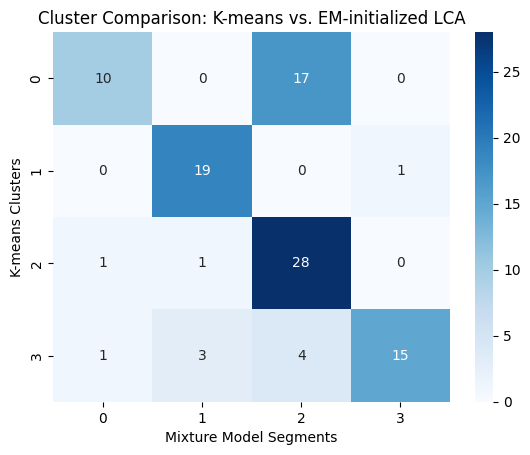

In [27]:
kmeans_model = KModes(n_clusters=4, init='Huang', n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(X)

def e_step(X, pi, theta):
    N, D = X.shape
    K = len(pi)
    gamma = np.zeros((N, K))
    for k in range(K):
        log_prob = X * np.log(theta[k] + 1e-10) + (1 - X) * np.log(1 - theta[k] + 1e-10)
        gamma[:, k] = np.log(pi[k] + 1e-10) + np.sum(log_prob, axis=1)
    gamma = np.exp(gamma)
    gamma /= np.sum(gamma, axis=1, keepdims=True)
    return gamma

def m_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    Nk = np.sum(gamma, axis=0)
    pi = Nk / N
    theta = np.dot(gamma.T, X) / Nk[:, None]
    return pi, theta

def run_em_with_init(X, init_labels, n_iter=50):
    N, D = X.shape
    K = len(np.unique(init_labels))
    gamma = np.zeros((N, K))
    for i, lbl in enumerate(init_labels):
        gamma[i, lbl] = 1.0

    for _ in range(n_iter):
        pi, theta = m_step(X, gamma)
        gamma = e_step(X, pi, theta)

    labels = np.argmax(gamma, axis=1)
    return labels

lca_labels_from_kmeans = run_em_with_init(X, kmeans_labels)

conf_matrix = confusion_matrix(kmeans_labels, lca_labels_from_kmeans)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster Comparison: K-means vs. EM-initialized LCA")
plt.xlabel("Mixture Model Segments")
plt.ylabel("K-means Clusters")
plt.show()

In [28]:
def compute_log_likelihood(X, pi, theta):
    N, D = X.shape
    K = len(pi)
    log_likelihood = 0
    for n in range(N):
        total = 0
        for k in range(K):
            p = pi[k] * np.prod(theta[k] ** X[n] * (1 - theta[k]) ** (1 - X[n]))
            total += p
        log_likelihood += np.log(total + 1e-10)
    return log_likelihood

In [29]:
print("Frequency of 'Like' responses:")
print(df['Like'].value_counts(sort=True))

Frequency of 'Like' responses:
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64


In [68]:
df1['Like.n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')
print("\nTable of 'Like.n':")
print(df['Like.n'].value_counts(sort=False))


Table of 'Like.n':
Like.n
9.0      73
4.0     187
5.0     152
2.0     160
8.0      59
3.0     229
6.0     169
10.0     71
7.0      58
Name: count, dtype: int64


In [64]:
mcdonalds = df.iloc[:, 0:11]

f = '+'.join(mcdonalds.columns)
f = f"Like.n ~ {f}"
f

'Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting'

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

df1['Like.n'] = 6 - pd.to_numeric(df1['Like'], errors='coerce')

df_=df1.dropna()
print(df_.head())

y = df_['Like.n'].values
X = pd.get_dummies(df_[['Age', 'Gender']], drop_first=True).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
init_labels = gmm.fit_predict(X_scaled)

def em_mixture_linear(X, y, init_labels, max_iter=100):
    N, K = len(y), len(np.unique(init_labels))
    gamma = np.zeros((N, K))
    for i, c in enumerate(init_labels):
        gamma[i, c] = 1.0

    for _ in range(max_iter):
        models = []
        pred = np.zeros((N, K))
        for k in range(K):
            model = LinearRegression()
            # Ensure sample_weight is the correct shape (N,)
            model.fit(X, y, sample_weight=gamma[:, k])
            models.append(model)
            pred[:, k] = model.predict(X)

        error = np.array([(y - pred[:, k])**2 for k in range(K)]).T
        log_prob = -0.5 * error
        gamma = np.exp(log_prob)
        gamma /= (gamma.sum(axis=1, keepdims=True) + 1e-10)

    final_labels = np.argmax(gamma, axis=1)
    return final_labels, models, gamma

final_labels, models, gamma = em_mixture_linear(X_scaled, y, init_labels)

unique, counts = np.unique(final_labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique + 1, counts)))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Like.n  
0         No   -3   61  Every three months  Female     9.0  
1         No   +2   51  Every three months  Female     4.0  
2         No   +1   62  Every three months  Female     5.0  
3        Yes   +4   69         Once a week  Female     2.0  
4         No   +2   49        Once a month    Male     4.0  
Cluster sizes: {np.int64(1): np.int64(429), np.int64(2): np.int64(729)}


In [74]:
final_models = models

print("\nSummary of Fitted Linear Models (by Segment):")
for i, model in enumerate(final_models):
    print(f"\nSegment {i+1}:")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Coefficients: {model.coef_}")


Summary of Fitted Linear Models (by Segment):

Segment 1:
  Intercept: 7.5116
  Coefficients: [ 0.45212025 -0.0260705 ]

Segment 2:
  Intercept: 3.5444
  Coefficients: [0.23372923 0.03507533]


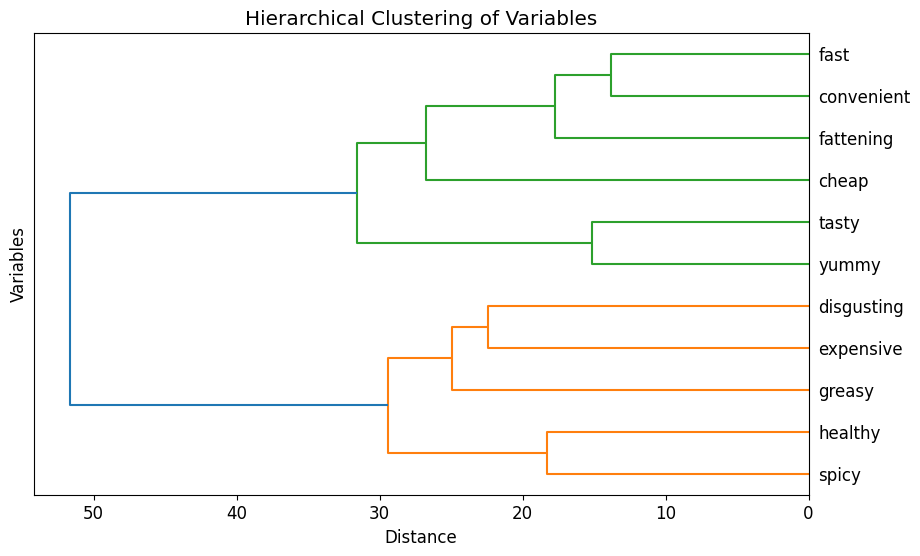

<Figure size 1200x800 with 0 Axes>

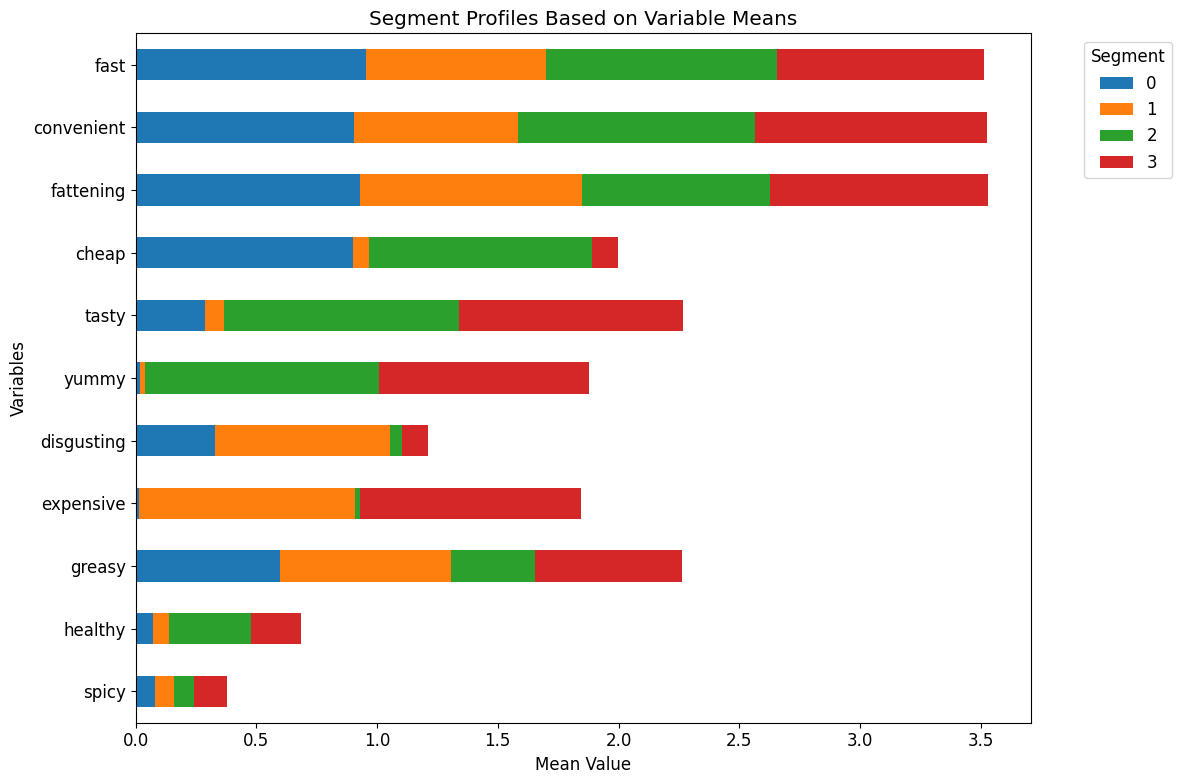

In [92]:
from scipy.cluster.hierarchy import linkage, dendrogram

MD_vclust = linkage(x.T, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=x.columns.tolist(), orientation='left')
plt.title("Hierarchical Clustering of Variables")
plt.xlabel("Distance")
plt.ylabel("Variables")
plt.show()

kmeans_final = KMeans(n_clusters=4, n_init=10, random_state=1234)
MD_k4 = kmeans_final.fit_predict(x)
segment_means = x.groupby(MD_k4).mean()

dendro = dendrogram(MD_vclust, labels=x.columns.tolist(), no_plot=True)
variable_order = [x.columns.tolist()[i] for i in dendro['leaves']]

segment_means_ordered = segment_means[variable_order]

segment_means_transposed = segment_means_ordered.T

plt.figure(figsize=(12, 8))
segment_means_transposed.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title("Segment Profiles Based on Variable Means")
plt.xlabel("Mean Value")
plt.ylabel("Variables")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

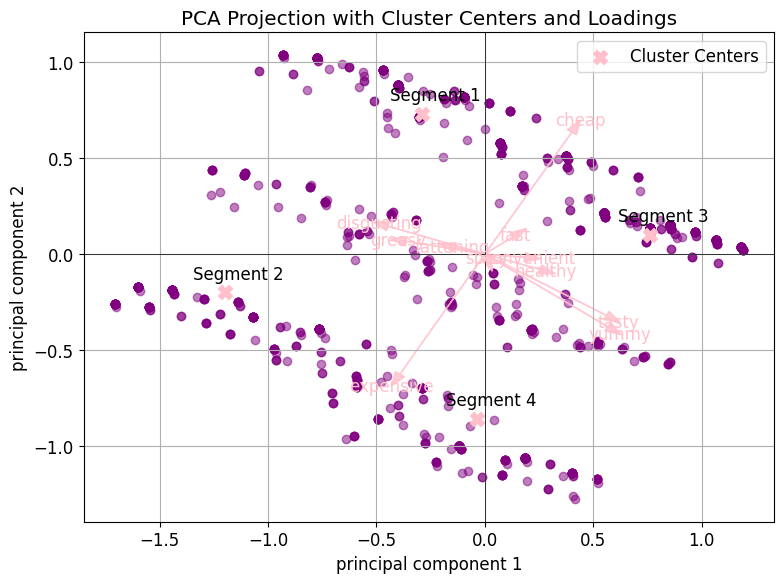

In [100]:
cluster_centers_pca = pca.transform(segment_means)
plt.figure(figsize=(8, 6))
plt.scatter(sc[:, 0], sc[:, 1], color='purple', alpha=0.5)

plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], color='pink', marker='X', s=100, label='Cluster Centers')

for i, txt in enumerate(segment_means.index):
    plt.annotate(f'Segment {txt + 1}', (cluster_centers_pca[i, 0], cluster_centers_pca[i, 1]), textcoords="offset points", xytext=(10,10), ha='center')

for i, (z, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, z * max(sc[:, 0]), y * max(sc[:, 1]),
              color='pink', alpha=0.8, head_width=0.05)
    plt.text(z * max(sc[:, 0]) * 1.1, y * max(sc[:, 1]) * 1.1,
             x.columns[i], color='pink', ha='center', va='center')

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("PCA Projection with Cluster Centers and Loadings")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

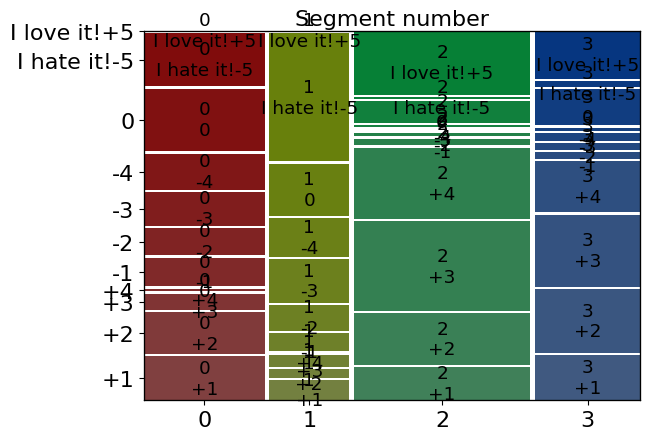

In [77]:
from statsmodels.graphics.mosaicplot import mosaic
MD_k4_series = pd.Series(MD_k4, name="Segment")
df_subset = df.iloc[:len(MD_k4)].copy()
MD_k4_series.index = df_subset.index
like_subset = df_subset['Like']
plt.rcParams['font.size'] = 16
plt.figure(figsize=(10, 8))
mosaic(pd.crosstab(MD_k4_series, like_subset).stack(), gap=0.01)
plt.suptitle("")
plt.xlabel("Segment number")
plt.ylabel("Like")
plt.show()

<Figure size 800x600 with 0 Axes>

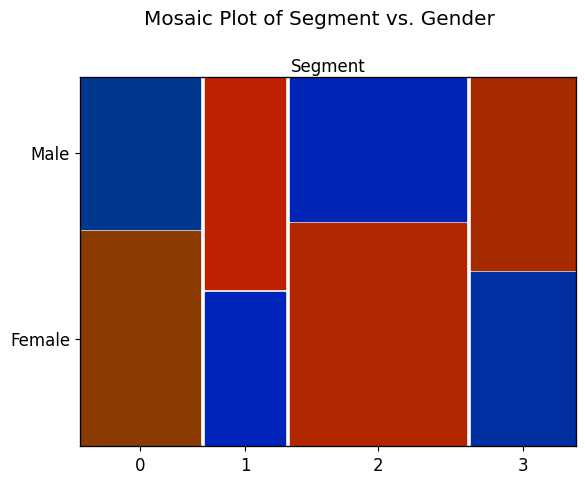

In [78]:
kmeans_final = KMeans(n_clusters=4, n_init=10, random_state=1234)
k4 = kmeans_final.fit_predict(x)
k4_series = pd.Series(k4, name="Segment")
gender_series = df1['Gender']
mosaic_data = pd.crosstab(k4_series, gender_series)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 6))
mosaic(mosaic_data.stack(), gap=0.01, statistic=True, labelizer=lambda k: '')
plt.suptitle("Mosaic Plot of Segment vs. Gender", y=1.02)
plt.xlabel("Segment")
plt.ylabel("Gender")
plt.show()

In [80]:
df1['k4'] = k4

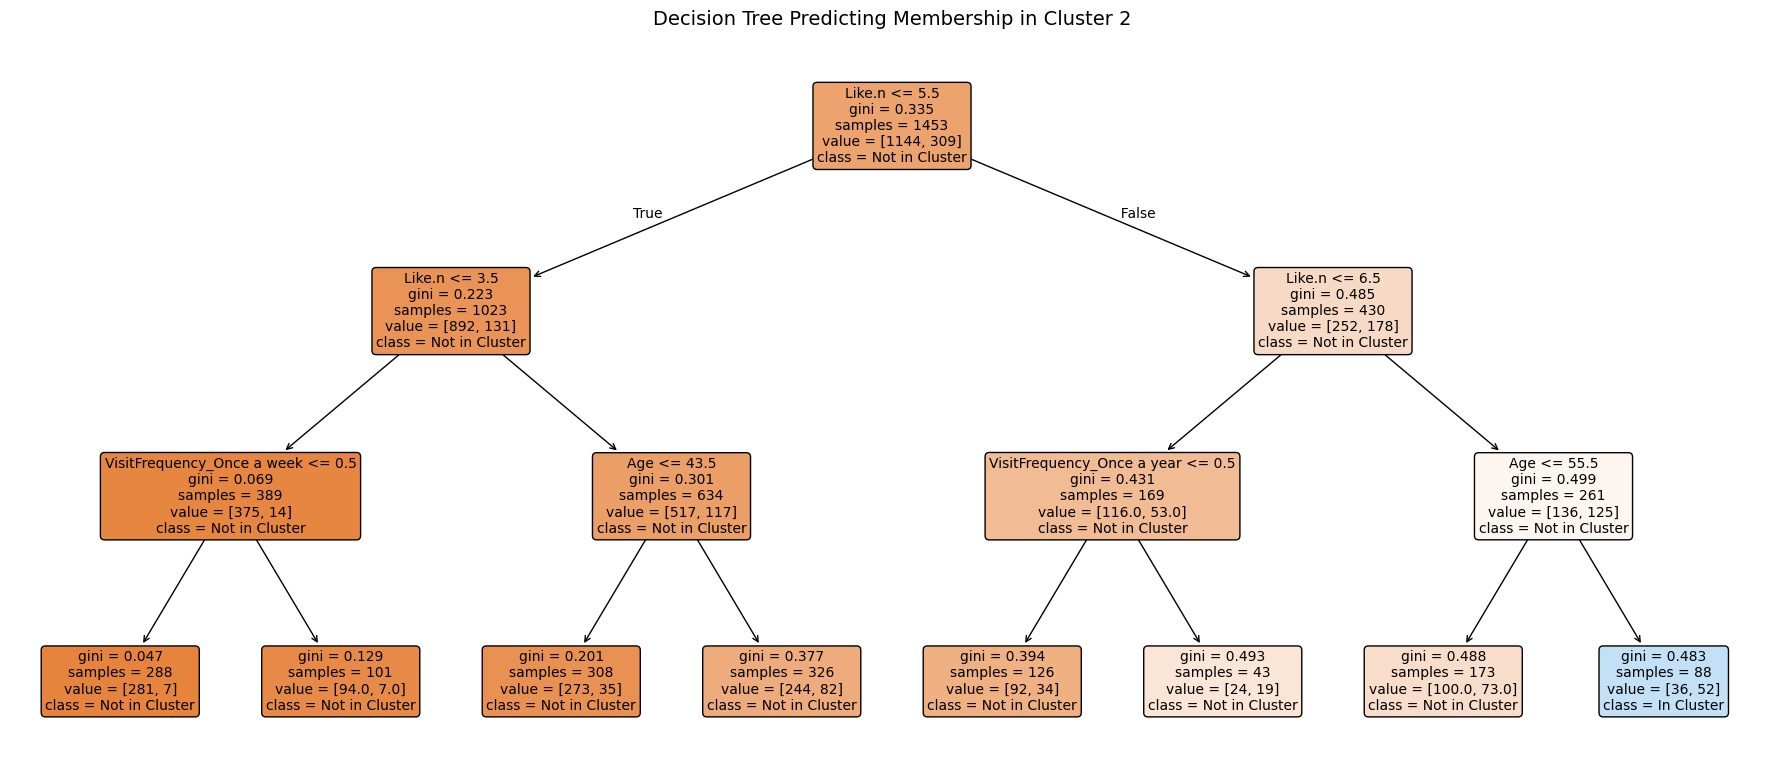

In [98]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def convert_like_column(value):
    try:
        return int(value)
    except:
        if isinstance(value, str) and '!' in value:
            try:
                return int(value.split('!')[-1])
            except:
                return np.nan
        return np.nan
df['LikeScore'] = df['Like'].apply(convert_like_column)
df['LikeScore'] = df['LikeScore'].fillna(df['LikeScore'].median())

# Convert categorical variables to dummy variables for clustering
cluster_features = df1[['Age', 'VisitFrequency', 'Gender', 'Like.n']].copy()
md_x = pd.get_dummies(cluster_features, columns=['VisitFrequency', 'Gender'])
model_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = model_k4.fit_predict(x)

# Choose a target cluster
target_label = 2
y = (cluster_labels == target_label).astype(int)
X_tree = md_x.copy()
clf_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_tree.fit(X_tree, y)

plt.figure(figsize=(18, 8))
plot_tree(clf_tree,
          feature_names=X_tree.columns,
          class_names=['Not in Cluster', 'In Cluster'],
          filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree Predicting Membership in Cluster {target_label}", fontsize=14)
plt.tight_layout()
plt.show()

Mean VisitFrequency (numeric) per cluster (k4):
 k4_cluster
0    1.708791
1    1.408333
2    3.000000
3    2.860759
Name: VisitFrequency_numeric, dtype: float64
------------------------------
Mean Like_n per cluster (k4):
 k4_cluster
0   -1.175824
1   -2.670833
2    2.834897
3    2.174051
Name: Like_n, dtype: float64
------------------------------
Mean proportion of Females per cluster (k4):
 k4_cluster
0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: Female_numeric, dtype: float64
------------------------------


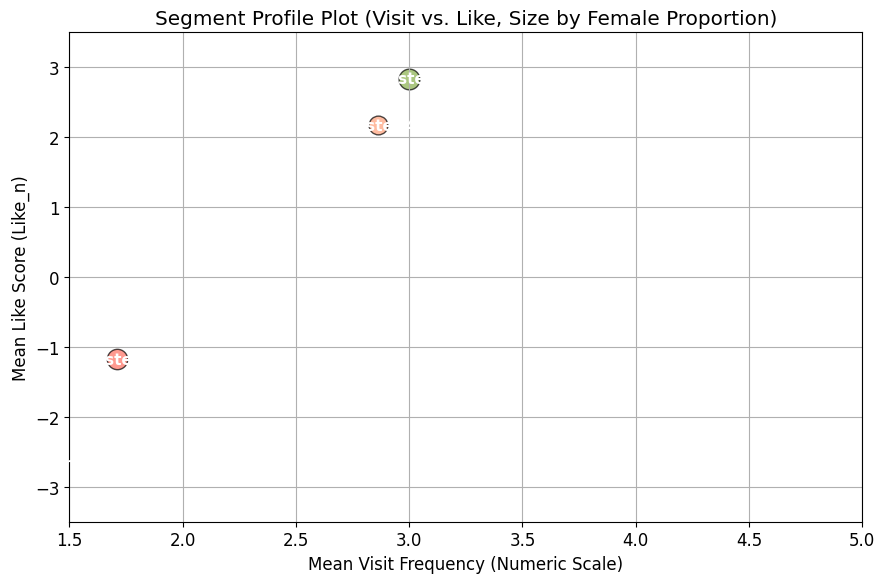

In [91]:
x = df.iloc[:, :11]

kmeans_k4_model = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_k4_labels = kmeans_k4_model.fit_predict(x)

analysis_df = df1.copy()
analysis_df['k4_cluster'] = kmeans_k4_labels

visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
analysis_df['VisitFrequency_numeric'] = analysis_df['VisitFrequency'].map(visit_freq_mapping)

visit_means = analysis_df.groupby('k4_cluster')['VisitFrequency_numeric'].mean()
print("Mean VisitFrequency (numeric) per cluster (k4):\n", visit_means)
print("-" * 30)

if 'Like_n' not in analysis_df.columns:
    def convert_like_to_numeric(value):
        if isinstance(value, (int, float)):
            return value
        if isinstance(value, str):
            value = value.strip()
            if 'I hate it!' in value or 'I love it!' in value:
                try:
                    return int(value.split('!')[-1])
                except:
                    return np.nan
            try:
                return int(value)
            except ValueError:
                return np.nan
        return np.nan

    analysis_df['Like_n'] = analysis_df['Like'].apply(convert_like_to_numeric)

    if analysis_df['Like_n'].isnull().any():
        median_like_n = analysis_df['Like_n'].median()
        analysis_df['Like_n'].fillna(median_like_n, inplace=True)
        print(f"Filled NaNs in 'Like_n' with median: {median_like_n:.2f}")

like_means = analysis_df.groupby('k4_cluster')['Like_n'].mean()
print("Mean Like_n per cluster (k4):\n", like_means)
print("-" * 30)

analysis_df['Female_numeric'] = (analysis_df['Gender'] == 'Female').astype(int)

female_means = analysis_df.groupby('k4_cluster')['Female_numeric'].mean()
print("Mean proportion of Females per cluster (k4):\n", female_means)
print("-" * 30)

plot_visit = visit_means.values
plot_like = like_means.values
plot_female_prop = female_means.values

base_size = 40
scale_factor = 300
point_sizes = base_size + (plot_female_prop * scale_factor)

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A']

plt.figure(figsize=(9, 6))
for i in range(4):
    plt.scatter(plot_visit[i], plot_like[i], s=point_sizes[i], c=colors[i], alpha=0.7, edgecolor='black')
    plt.text(plot_visit[i], plot_like[i], f"Cluster {i+1}", fontsize=11, ha='center', va='center', color='white', weight='bold')

plt.xlabel("Mean Visit Frequency (Numeric Scale)")
plt.ylabel("Mean Like Score (Like_n)")
plt.title("Segment Profile Plot (Visit vs. Like, Size by Female Proportion)")
plt.xlim(1.5, 5)
plt.ylim(-3.5, 3.5)
plt.grid(True)
plt.tight_layout()
plt.show()